In [1]:
import mayavi
# from mayavi import tools
from mayavi import mlab
import numpy as np

In [2]:
# temporary hack to import orbkit
import sys
sys.path.append('C:\orbkit-cython')
from orbkit import read, grid, display, atomic_populations, options, multiple_files, main, extras, output
from orbkit.output import pdb_creator,xyz_creator
import orbkit as ok
# from orbkit.display import init_display,display,tForm
import matplotlib.pyplot as plt
%matplotlib inline

C:\ProgramData\Miniconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [4]:
# read out molden file, will make option to only read out select few
qc = read.main_read('nw.molden',itype='molden',all_mo=True)

Opened 
	nw.molden

Loading molden file...
The atomic orbitals are not normalized correctly, renormalizing...



### automatically sets up 3d grid -8 to 8, will work on making it adjustable since it cuts off part of the molecule

In [5]:
# make into dictionary to compute rho .....
qc_select = qc.todict()
mo_list = ok.rho_compute(qc_select,calc_mo=True)


Setting up the grid...
	x[0] = -8.00 x[-1] = 8.00 Nx = 1030301 dx = 0.160
	y[0] = -8.00 y[-1] = 8.00 Ny = 1030301 dy = 0.160
	z[0] = -8.00 z[-1] = 8.00 Nz = 1030301 dz = 0.160


Starting the calculation of the molecular orbitals...
The grid has been separated into 104 slices each having 1.00e+04 grid points.
The calculation will be carried out using only one process.

	The number of subprocesses can be changed with -p


There are 419 contracted Cartesian AOs and 419 MOs to be calculated.
	Finished 10 % (12 slices in 57.768 s)
	Finished 20 % (10 slices in 53.505 s)
	Finished 30 % (11 slices in 51.860 s)
	Finished 40 % (10 slices in 54.319 s)
	Finished 50 % (10 slices in 60.238 s)
	Finished 60 % (11 slices in 65.502 s)
	Finished 70 % (10 slices in 54.470 s)
	Finished 80 % (11 slices in 77.662 s)
	Finished 90 % (10 slices in 101.293 s)


### Not sure why it's calculating MOs with positive energy. With some other orbkit options, I found out the HOMO is num.89, which makes sense as far as being less than 0 energy. 

### Let me know if you understand why everything after num. 91 is positive and if you want me to try to limit calculations to all MOs less than 0

In [6]:
# make dictionary of MO energies
mos = np.linspace(1,len(qc.mo_spec),num=len(qc.mo_spec),dtype=int)
energies = []
for x in range(len(qc.mo_spec)):
    #mos.append(qc.mo_spec[x]['sym'])
    energies.append(qc.mo_spec[x]['energy'])
mo_energies = dict(zip(mos, energies))
mo_energies

{1: -19.155611294539,
 2: -19.109958368004,
 3: -14.368495235455,
 4: -14.32404451848,
 5: -10.284973646686,
 6: -10.250053925969,
 7: -10.241737408752,
 8: -10.228243499586,
 9: -10.222529902838,
 10: -10.220709541449,
 11: -10.219694593708,
 12: -10.210716304884,
 13: -10.210473734606,
 14: -10.20793769977,
 15: -10.201216306295,
 16: -10.200931662607,
 17: -10.194274698534,
 18: -10.193018477271,
 19: -10.189601624845,
 20: -10.18919756251,
 21: -10.187973298455,
 22: -10.185072972145,
 23: -10.183961260008,
 24: -10.182169008152,
 25: -10.17874223987,
 26: -1.0387032922254,
 27: -1.0301677960829,
 28: -0.9589115380789,
 29: -0.93674518430835,
 30: -0.85107397483222,
 31: -0.8382777185994,
 32: -0.81700089056893,
 33: -0.80102542427515,
 34: -0.77166364969826,
 35: -0.74564227919662,
 36: -0.74097302560194,
 37: -0.73050511977416,
 38: -0.7137665888529,
 39: -0.70632767766279,
 40: -0.66457315778689,
 41: -0.64312823940096,
 42: -0.63540950664545,
 43: -0.62709100407768,
 44: -0.603

### Choose which MO to look at

In [31]:
# which MO to view
mo = 45
# index of MO
selected_mo = mo - 1

In [32]:
# reshape output of mo_list into 3d array
a = mo_list.shape[1]
# cube root for reshaping into 3d
d = int(round(np.power(a,1/3)))
mo_list = mo_list.reshape(mo_list.shape[0],d,d,d)

ValueError: cannot reshape array of size 431696119 into shape (419,5,5,5)

In [33]:
# shape should now be (# MOs,101,101,101)
mo_list.shape

(419, 101, 101, 101)

## 3D figure issues
### 1. can't find which isosurface it is... assuming 90%?
### 2. can grid be bigger than -8 to 8?
### 3. labeling doesn't seem to work for x3d, does work for contour plot though
### 4. doesn't show axes. 3 and 4 may be because of Jupyter Notebook, will see if it works on Mayavi viewer

Notebook initialized with png backend.



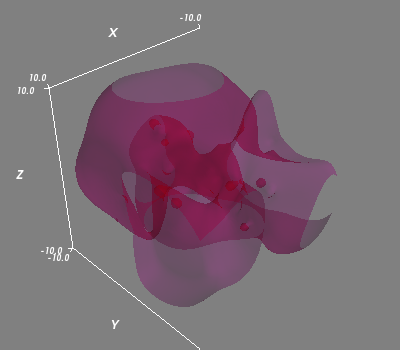

In [50]:
# contour spacing and opacity, user should set
cont = 0.0001
opacity = 0.2
# clear figure and re-initialize notebook with x3d for interactive,
# run this each time you want a new figure
mlab.clf()
mlab.init_notebook('png',500,500)
# 3d MO plot
src = mlab.pipeline.scalar_field(mo_list[selected_mo])
mlab.pipeline.iso_surface(\
    src, contours=[cont, ], opacity=opacity, color=(0, 0, 0.8), extent=[-10,10,-10,10,-10,10])
mlab.pipeline.iso_surface(\
    src, contours=[cont, ], opacity=opacity, color=(0.8, 0, 0), extent=[-10,10,-10,10,-10,10])
mlab.axes()

In [35]:
# set up plotting grid
x=np.linspace(-8,8,mo_list.shape[1])
y=np.linspace(-8,8,mo_list.shape[1])
X,Y=np.meshgrid(x,y)

## Contour plots of xy, xz, yz slices

C:\Users\Nathan\AppData\Roaming\Python\Python36\site-packages\matplotlib\figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


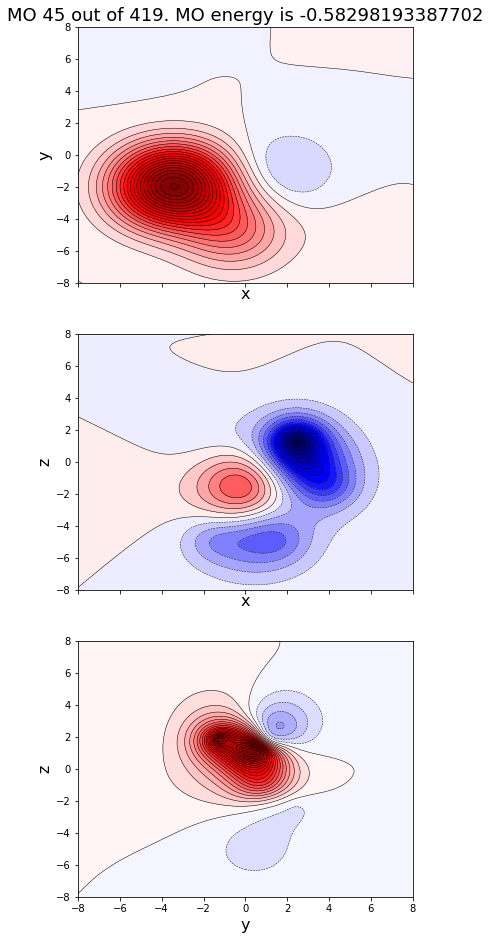

In [36]:
# slice density data for contour plots
mo_list_xy = mo_list[selected_mo][:,:,0]
mo_list_xz = mo_list[selected_mo][:,0,:]
mo_list_yz = mo_list[selected_mo][0,:,:]


# set up grid of 3x1 contour plots of electron density for selected MO
# manually set number of contour lines
contour_lines = 25
# plotting grid
f, (pic1, pic2, pic3) = \
            plt.subplots(3,1,sharex=True,sharey=True,figsize=(6,16))
    
# figure 1
pic1.contour(X,Y,mo_list_xy,contour_lines,linewidths=0.5,colors='k')
pic1.contourf(\
    X,Y,mo_list_xy,contour_lines,cmap='seismic',vmax=abs(mo_list_xy).max(),vmin=-abs(mo_list_xy).max())
pic1.set_xlabel('x',fontsize=16)
pic1.set_ylabel('y',fontsize=16)
# set title for whole figure
pic1.set_title('MO {0} out of {1}. MO energy is {2}'.\
               format((mo), mo_list.shape[0]-1 + 1, mo_energies[mo]),fontsize=18)

# figure 2
pic2.contour(X,Y,mo_list_xz,contour_lines,linewidths=0.5,colors='k')
pic2.contourf(\
    X,Y,mo_list_xz,contour_lines,cmap='seismic',vmax=abs(mo_list_xz).max(),vmin=-abs(mo_list_xz).max())    
pic2.set_xlabel('x',fontsize=16)
pic2.set_ylabel('z',fontsize=16)

# figure 3
pic3.contour(X,Y,mo_list_yz,contour_lines,linewidths=0.5,colors='k')
pic3.contourf(\
    X,Y,mo_list_yz,contour_lines,cmap='seismic',vmax=abs(mo_list_yz).max(),vmin=-abs(mo_list_yz).max())  
pic3.set_xlabel('y',fontsize=16)
pic3.set_ylabel('z',fontsize=16)     

# plot
f.show()

## for offscreen rendering and saving

In [ ]:
mlab.options.offscreen = True
mlab.test_contour3d()
mlab.savefig('example.png')

## Not that helpful, let me know if you want to keep this feature or throw it out

In [51]:
# 2 dimensional slices
mlab.clf()
mlab.init_notebook('x3d',500,500)
src = mlab.pipeline.scalar_field(mo_list[selected_mo])
mlab.pipeline.image_plane_widget(\
    src,plane_orientation='x_axes',slice_index=0,plane_opacity=0.1, vmax=1.0, vmin=0, transparent=True)
mlab.pipeline.image_plane_widget(\
    src,plane_orientation='y_axes',slice_index=0,plane_opacity=0.1, vmax=1.0, vmin=0, transparent=True)

Notebook initialized with x3d backend.


## This could be a great plot, but it doesn't seem to work with x3d. I'll see what I can do with it.

Notebook initialized with png backend.



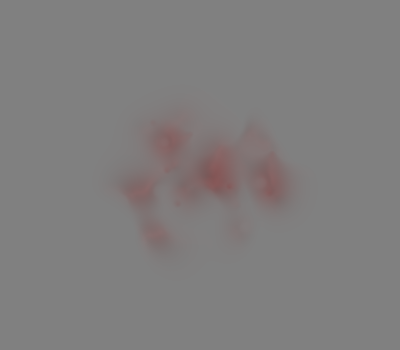

In [48]:
# clear figure and re-initialize notebook
# clear and initialize
mlab.clf()
mlab.init_notebook('png',50,50)

src = mlab.pipeline.scalar_field(mo_list[selected_mo])
mlab.pipeline.volume(src,color=(0.8, 0, 0),vmin=0,vmax=1.0,name='test')

## Next will work on:
### 1. plotting nucleus locations with the density plots
### 2. giving option to plot only homo/lumo for faster calculations

In [297]:
pop = atomic_populations.mulliken(qc)
pop = atomic_populations.lowdin(qc)
# Write a PDB file
pdb_creator(qc.geo_info,qc.geo_spec,filename='charges',charges=pop['charge'],comments='')
# Write an xyz file
xyz_creator(qc.geo_info,qc.geo_spec,filename='charges',charges=pop['charge'],comments='')

Figure out which AO is HOMO/LUMO and give option to calculate only those